## Statistics Tools

<span style=" color:red">NOTE</span>: In this notebook I use the`stats`  submodule of `scipy` for <em>all</em> statistics functions, including generation of random numbers. There are other modules with some overlapping functionality, e.g., the regular python `random` module, and the `np.random` module, but I do not use them here.  The `stats` submodule includes tools for a large number of distributions, it includes a large and growing set of statistical functions, and there is a unified class structure.  In addition, potential namespace issues are minimized. See https://docs.scipy.org/doc/scipy/reference/stats.html.

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# Following set up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

### Generating random integers

In [4]:
# Generate n integers between low and high:
low = -3
high = 6
n = 100

# or equivalently:
# loq, high, n = (-3, 6, 100)

stats.randint.rvs(low, high+1, size=n)

array([ 5, -1,  4,  6,  5,  2,  4,  3, -2, -2,  4,  3, -1, -3,  5,  4, -2,
       -3, -2, -1, -3,  6,  0,  6, -1,  6,  3, -2, -3,  2, -1,  4,  2, -1,
        0,  2,  2, -2, -1, -2,  3, -2,  6, -2, -2,  2,  5, -3, -1, -1,  2,
        1,  2, -1,  6,  3,  2,  3,  3, -1,  5,  0,  0,  3, -1,  2,  1,  0,
        1,  2,  4,  5,  2,  3,  6,  1, -2,  0,  2, -3,  5, -2,  3,  4,  1,
        0,  4,  2,  5, -1,  1,  2, -2,  4,  4, -2,  1,  3, -3,  1])

### Sampling random numbers from a uniform p.d.f.

In [5]:
# Sample n random numbers in interval [0.0,1.0):
n = 10
stats.uniform.rvs(size=10)

array([0.42047481, 0.1307043 , 0.4010014 , 0.01879577, 0.33089159,
       0.05448945, 0.26164408, 0.48571472, 0.0853292 , 0.04025269])

### Sampling random numbers from a normal distribution

Sample $n$  random numbers from the normal distribution with mean $\mu$, standard deviation $\sigma$, and pdf of Eq.(2.4) of Hughes & Hase:
\begin{equation}
p(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x-\mu)^2}{\sigma^2}\right]
\end{equation}

In [6]:
# Sampling from normal distribution
n = 10
mean = 10.
sigma = 2.
stats.norm.rvs(mean, sigma, size=n)

array([ 9.26700711, 12.99984945,  9.52717753, 10.4815938 ,  8.68168832,
        8.92552407, 10.0575755 , 11.26104888, 11.17737725,  8.45934376])

#### Graph the pdf of the normal distribution.

<IPython.core.display.Javascript object>


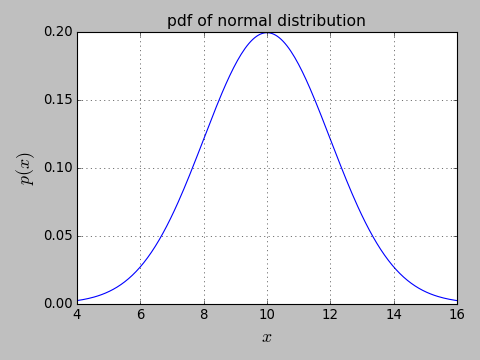

In [7]:
plt.figure()
x = np.linspace(mean-3.*sigma, mean+3.*sigma,200) 
y = stats.norm.pdf(x, mean, sigma)
plt.title("pdf of normal distribution")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid()
plt.plot(x, y);

### Graph of the cdf of normal distribution

<IPython.core.display.Javascript object>


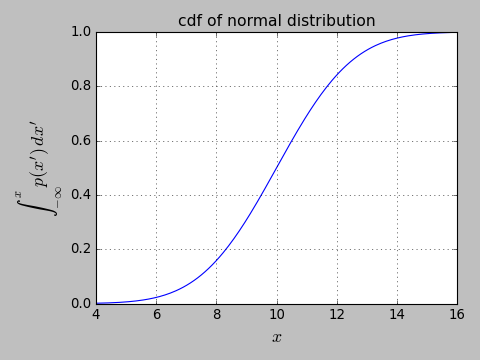

In [8]:
plt.figure()
x = np.linspace(mean-3.*sigma, mean+3.*sigma, 200)
y = stats.norm.cdf(x, mean, sigma)
plt.title("cdf of normal distribution")
plt.xlabel("$x$")
plt.ylabel("$\int_{-\infty}^x p(x^\prime)\, dx^\prime$")
plt.grid()
plt.plot(x, y);

## Sampling random numbers from a Poisson distribution

Sample $n$  random numbers from the Poisson distribution with average count $\overline{N}$, and probability distibution given by  Eq.(3.1) of Hughes & Hase:
\begin{equation}
p(N;\overline{N}) = \frac{\exp\left(-\overline{N}\right)\overline{N}^N}{N!}
\end{equation}
The standard deviation of the Poisson distribution is given by 
$$ \sigma = \sqrt{\overline{N}}.  $$

In [9]:
# Sampling from a Poisson distribution 
n = 100
mean = 5
stats.poisson.rvs(mean, size=n)

array([11,  5,  5,  7,  5,  5,  5,  7,  8,  4,  4,  7,  4,  6,  7,  2,  7,
        4,  4, 12,  6,  3,  0, 10,  6,  8,  3,  9,  5,  3,  7,  8,  6,  5,
        4,  4,  3,  4,  4,  5,  2,  6,  8,  4,  3,  0,  3,  7,  6,  7,  9,
        5,  5,  1,  6,  4,  5,  4,  6,  7,  5,  3,  8,  2,  6,  7,  7,  3,
        5,  3,  4,  4,  3,  6,  5,  8,  4,  3,  4,  5,  9,  8,  4,  4,  4,
        2,  2,  3,  8, 10,  3,  6, 10,  4,  5,  4,  3,  6,  6,  6])

In [10]:
np.mean(_)    # The underscore "_" is similar to Mathematicas "%"
              # It refers to the output of the previously executed cell

5.22

In [11]:
np.std(__)    # Notice the double underscore "__"

2.2828929015615245

In [12]:
np.sqrt(mean)

2.23606797749979

#### Graph of pmf ($\sim$pdf) of Poisson distribution

<IPython.core.display.Javascript object>


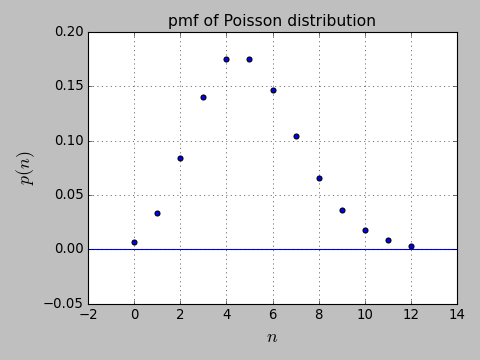

In [13]:
plt.figure()
x = np.linspace(0, 12, 13)
y = stats.poisson.pmf(x, mean)
plt.title("pmf of Poisson distribution")
plt.xlabel("$n$")
plt.ylabel("$p(n)$")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);


#### Graph of the cdf of Poisson distribution

<IPython.core.display.Javascript object>


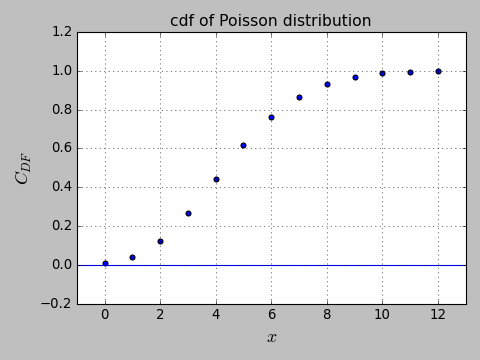

In [14]:
plt.figure()
x = np.linspace(0, 12, 13)
y = stats.poisson.cdf(x, mean)
plt.title("cdf of Poisson distribution")
plt.xlabel("$x$")
plt.ylabel("$C_{DF}$")
plt.xlim(-1, 13)
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

## Sampling random numbers from a binomial distribution

Consider $n$ trials, with probability of success $p$ in each trial.  The array below is the number successes in each of $size$ trials.

In [15]:
# Sampling from a binomial distribution
n = 2
p = 0.4
stats.binom.rvs(n, p, size=100)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0])

In [16]:
np.mean(_)


0.78

The probablity of getting $x$ successes is given by the probability mass function (pmf).  This is analogous to the continous pdf (and it's called the PDF in Mathematica).  As an example, the probability of 2 successes in 3 trials with a probability of success in each trial of 0.4 is
29%:


In [17]:
n, s, p = (3, 2, 0.4)
stats.binom.pmf(s, n, p)

0.288

#### Graph of pmf (~pdf) of binomial distribution

<IPython.core.display.Javascript object>


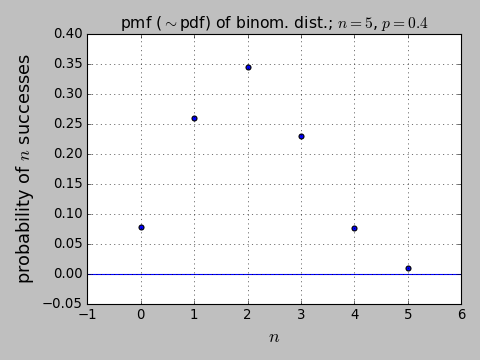

In [18]:
plt.figure()
n = 5
x = np.linspace(0, n, n+1)
y = stats.binom.pmf(x, n, p)

plt.title("pmf ($\sim$pdf) of binom. dist.; $n=5$, $p = 0.4$")
plt.xlabel("$n$")
plt.ylabel("probability of $n$ successes")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

#### Graph of cdf of binomial distribution

<IPython.core.display.Javascript object>


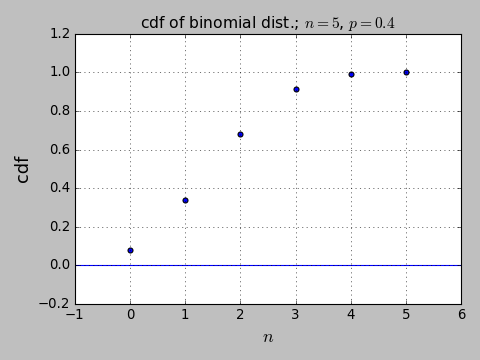

In [19]:
plt.figure()
n = 5
x = np.linspace(0, n, n+1)
y = stats.binom.cdf(x, n, p)
plt.title("cdf of binomial dist.; $n=5$, $p = 0.4$")
plt.xlabel("$n$")
plt.ylabel("cdf")
plt.grid()
plt.axhline(0)
plt.scatter(x, y);

## Histograms

##### Generate some random data from a normal distribution.

In [20]:
n = 100
mean = 10.
sigma = 2.
data = stats.norm.rvs(mean, sigma, size=n)

#### Select number of bins between low and high values.

<b>NOTE:</b> `plt.hist` plots the histogram, and ouputs the binned data

<IPython.core.display.Javascript object>


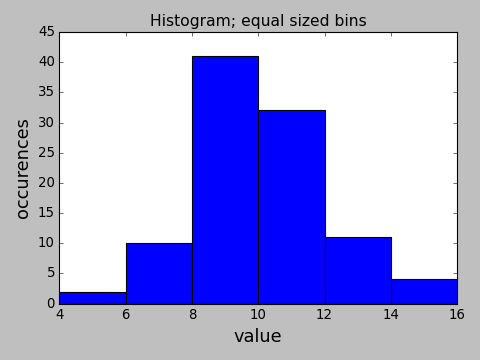

(array([ 2., 10., 41., 32., 11.,  4.]),
 array([ 4.,  6.,  8., 10., 12., 14., 16.]))

In [21]:
plt.figure()
nbins = 6
low = mean - 3*sigma
high = mean + 3*sigma
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("Histogram; equal sized bins")
out = plt.hist(data, nbins, [low,high])
out[0],out[1]    # occurrences and bin boundaries

#### OR ... Select specific bin boundaries
Again, `plt.hist` outputs the binned data and plots the histogram.


<IPython.core.display.Javascript object>


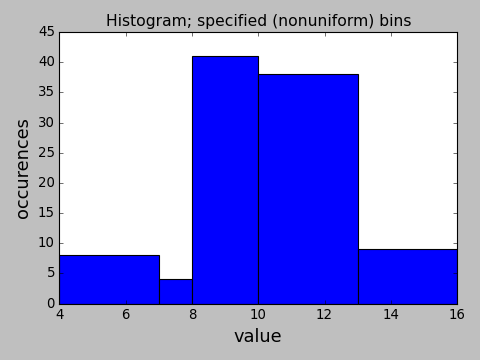

(array([ 8.,  4., 41., 38.,  9.]), array([ 4,  7,  8, 10, 13, 16]))

In [22]:
plt.figure()
bins = [4, 7, 8, 10, 13, 16]
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("Histogram; specified (nonuniform) bins")
out = plt.hist(data, bins)
out[0],out[1]   # occurrences and bin boundaries

#### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [23]:
%load_ext version_information

In [24]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 14:30:48 2020 EDT